In [ ]:
from simulator import HathorSimulator, Miner, TxGenerator
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import random

In [2]:
simulators = []

In [3]:
for tx_lambda in [2, 1, 1/4., 1/2.]:
    print(tx_lambda)
    
    sim = HathorSimulator(block_weight=20.30)

    m0 = Miner(hashpower=10000)
    sim.add_miner(m0)

    g1 = TxGenerator(tx_lambda=tx_lambda, hashpower=10000)
    sim.add_tx_generator(g1)
    
    sim.run(3600*24)
    
    simulators.append(sim)

2
1
0.25
0.5


In [4]:
for tx_lambda in [1/8., 1/16., 1/32., 1/64.]:
    print(tx_lambda)
    
    sim = HathorSimulator(block_weight=20.30)

    m0 = Miner(hashpower=10000)
    sim.add_miner(m0)

    g1 = TxGenerator(tx_lambda=tx_lambda, hashpower=10000)
    sim.add_tx_generator(g1)
    
    sim.run(3600*24*3)
    
    simulators.append(sim)

0.125
0.0625
0.03125
0.015625


(0, 0.006)

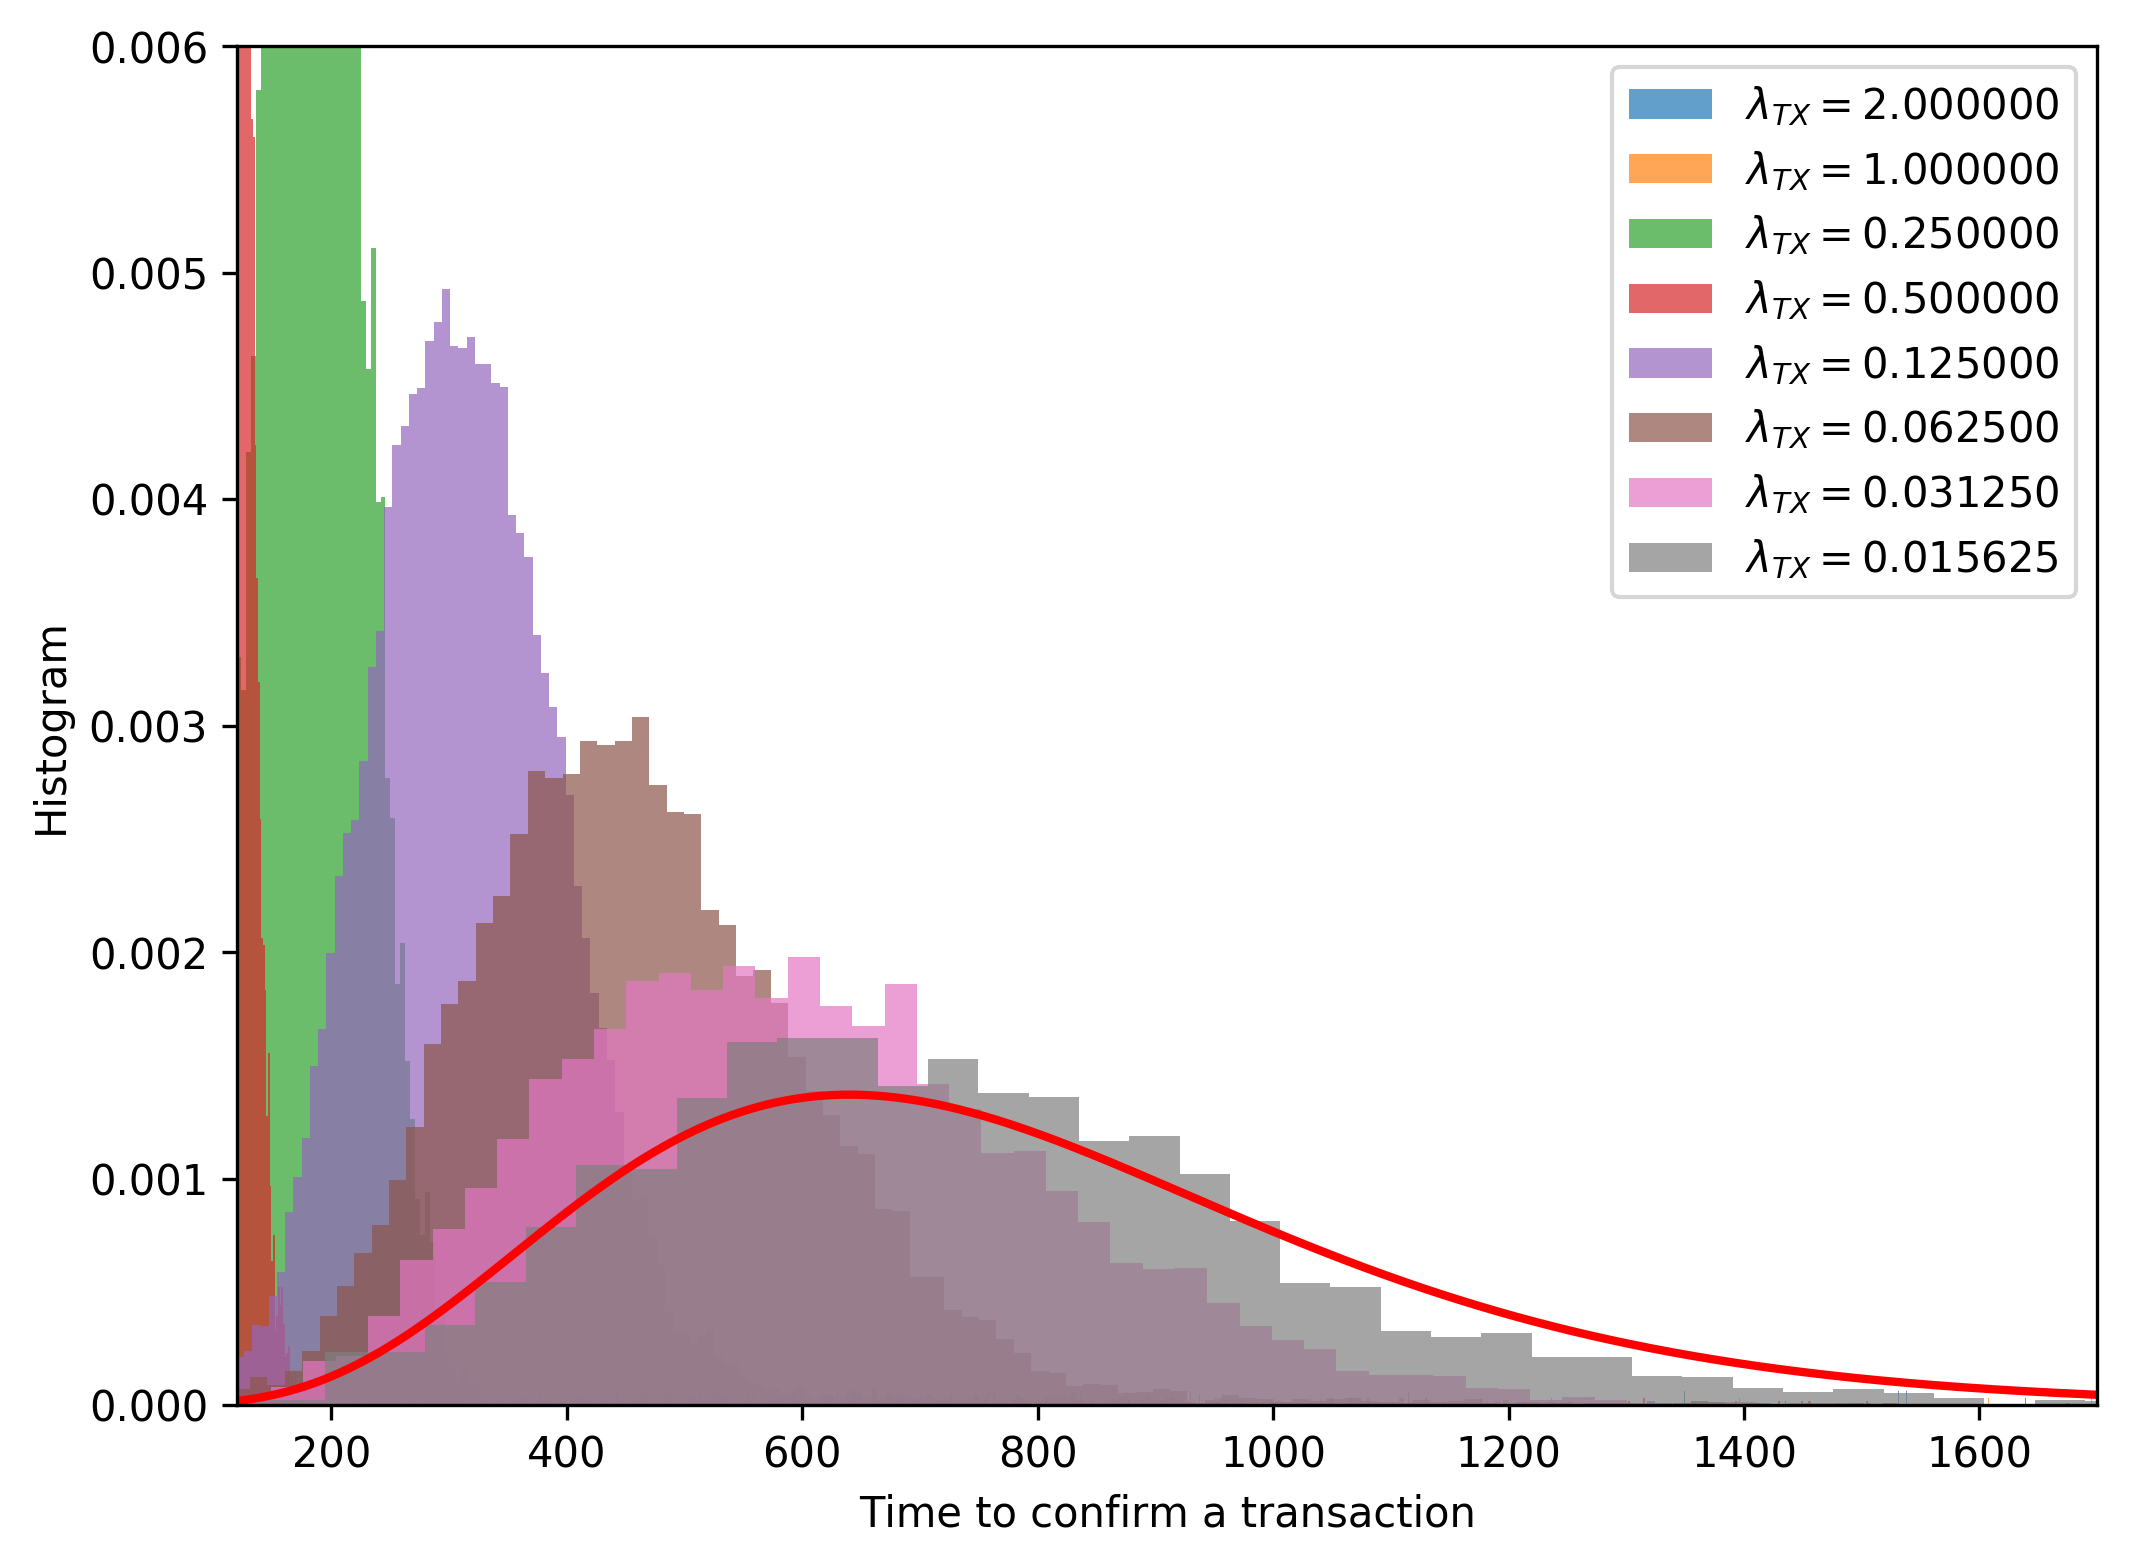

In [9]:
plt.figure(figsize=(8, 6), dpi=300)
for sim in simulators:
    nodes = sim.transactions + sim.blocks
    nodes.sort(key=lambda x: x.time)
    v = [tx.extras['confirmed_time'] - tx.time for tx in nodes if tx.type == 'tx' and 'confirmed_time' in tx.extras]
    if len(v) > 50000:
        v2 = random.sample(v, 50000)
    else:
        v2 = v
    plt.hist(v2, bins='fd', density=True, alpha=0.7, label='$\lambda_{{TX}} = {:.6f}$'.format(sim.tx_generators[0].tx_lambda));

x = np.linspace(0, max(v), 1000)
y = scipy.stats.erlang.pdf(x, 6, 0, 128)
plt.plot(x, y, 'r', linewidth=2);

plt.ylabel('Histogram')
plt.xlabel('Time to confirm a transaction');
plt.legend();

plt.xlim(120, 1700)
plt.ylim(0, 0.006)

In [ ]:
print(sim.block_weight, sim.min_weight_confirmed)
for tx in nodes:
    if 'confirmed_time' in tx.extras:
        dt = tx.extras['confirmed_time'] - tx.time
        if dt > 1000:
            print(tx.name, tx.type, tx.weight, tx.acc_weight, dt)

In [ ]:
for tx in sim.blocks:
    print(tx.name, tx.weight, tx.acc_weight)

In [ ]:
dot = sim.gen_dot()
#dot.attr(rankdir='RL')
dot.attr(rankdir='BT')
dot.attr(size='200, 30')

#print(dot.render())
print(dot.source)